# Project on product recommendation using Popularity based & Collaberative Filtering method

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns

In [2]:
#import data
data=pd.read_csv('C:/Users/LENOVO/datascience/greatlearning/Project_recommender_system/ratings_Electronics.csv', header = None) 
data.head() 

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### Attribute Information:
● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [3]:
data.shape

(7824482, 4)

In [4]:
data.columns = ['UserId', 'ProductId', 'Ratings','timestamp']

In [5]:
data.head() 

,UserId,ProductId,Ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
#Dropping the timestamp column
data1=data.iloc[:,0:3]
data1.head() 

,UserId,ProductId,Ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
#Data type of attributes
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
UserId       object
ProductId    object
Ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


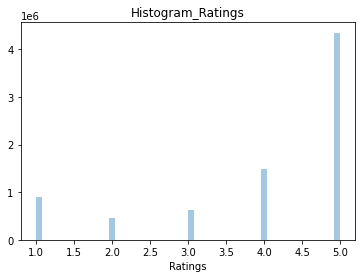

In [8]:
#Ratings distribution
sns.distplot(data1['Ratings'],kde=False)
plt.title('Histogram_Ratings')
plt.show()

In [9]:
#Check what is the maximum number a user has recorded the ratings
data1['UserId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A1E50QSDNUODIY      1
A3EDD9B7HY6XOH      1
A3SIACGCRBDPD5      1
A32PS93VQ1P70H      1
A1JIOHB3X85JPA      1
Name: UserId, Length: 4201696, dtype: int64

In [10]:
#Creating a dataset containg only details where there are more than 50 ratings by a particulaar user
data2=data1[data1['UserId'].map(data1['UserId'].value_counts()) > 50]

In [11]:
data2.shape

(122171, 3)

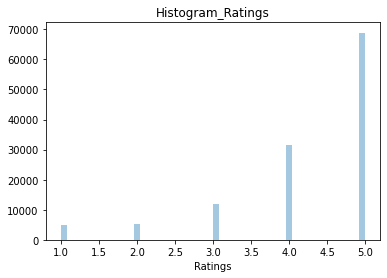

In [12]:
#Ratings distribution
sns.distplot(data2['Ratings'],kde=False)
plt.title('Histogram_Ratings')
plt.show()

In [13]:
data2['Ratings'].describe()

count    122171.000000
mean          4.262616
std           1.058826
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Ratings, dtype: float64

In [14]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(data2.Ratings.min()))
print('Maximum rating is: %d' %(data2.Ratings.max()))

Minimum rating is: 1
Maximum rating is: 5


### Unique Users and products

In [15]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",data2.shape[0])
print("Total No of Users   :", len(np.unique(data2.UserId)))
print("Total No of products  :", len(np.unique(data2.ProductId)))

Total data 
--------------------------------------------------

Total no of ratings : 122171
Total No of Users   : 1466
Total No of products  : 47155


## Popularity based recommendation


In [16]:
data2.groupby('ProductId')['Ratings'].mean().head(10) 

ProductId
0594481813    3.00
0970407998    2.50
0972683275    5.00
1400501466    3.00
1400501520    5.00
1400501776    4.50
1400532620    3.00
1400532655    3.60
140053271X    2.50
1400599997    3.75
Name: Ratings, dtype: float64

In [17]:
data2.groupby('ProductId')['Ratings'].mean().sort_values(ascending=False).head() 

ProductId
B00LKG1MC8    5.0
B000H8WLKC    5.0
B000HA4EZK    5.0
B004EHZZDW    5.0
B004EI0EG4    5.0
Name: Ratings, dtype: float64

In [18]:
data2.groupby('ProductId')['Ratings'].count().sort_values(ascending=False).head()  

ProductId
B0088CJT4U    204
B003ES5ZUU    177
B000N99BBC    163
B007WTAJTO    156
B00829TIEK    146
Name: Ratings, dtype: int64

In [19]:
ratings_mean_count = pd.DataFrame(data2.groupby('ProductId')['Ratings'].mean()) 

In [20]:
ratings_mean_count['rating_counts'] = pd.DataFrame(data2.groupby('ProductId')['Ratings'].count())  

In [21]:
ratings_mean_count.head() 


,Ratings,rating_counts
ProductId,,
0594481813,3.0,1
0970407998,2.5,2
0972683275,5.0,3
1400501466,3.0,5
1400501520,5.0,1


In [22]:
ratings_mean_count.shape

(47155, 2)

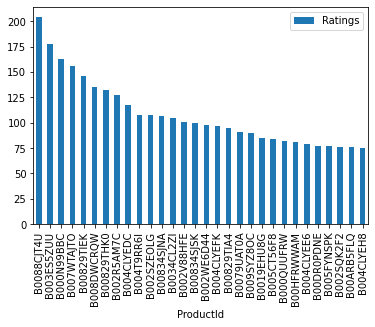

In [23]:
popular_products = pd.DataFrame(data2.groupby('ProductId')['Ratings'].count())
most_popular = popular_products.sort_values('Ratings', ascending=False)
most_popular.head(30).plot(kind = "bar")

## User User collaberative filtering

In [24]:
#!pip install scikit-surprise

In [25]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [26]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data3 = Dataset.load_from_df(data2,reader)

In [27]:
#Train,test split
trainset, testset = train_test_split(data3, test_size=.30,random_state=10)

In [28]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [29]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [30]:
# get RMSE
print("User User Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User User Model : Test Set
RMSE: 1.0468


1.0467875670473143

In [34]:
test_pred

[Prediction(uid='AJL3U764D7NI3', iid='B0002LEMWE', r_ui=5.0, est=4.711111111111111, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A2RU4U1JZ3DMP5', iid='B0031AQ302', r_ui=4.0, est=4.190476190476191, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A84FLVDK2R5JF', iid='B004N625AK', r_ui=5.0, est=4.142857142857143, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A32482Z7XIKDQX', iid='B00EBPNC78', r_ui=5.0, est=4.261181725698383, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3A4ZAIBQWKOZS', iid='B00067OEPO', r_ui=4.0, est=4.261181725698383, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3W4D8XOGLWUN5', iid='B004MPR0ZC', r_ui=4.0, est=4.261181725698383, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1E1LEVQ9VQNK', iid='B005OOKNP4', r_ui=5.0, est=5, details={'actual_k': 4, 'was_impossible': F